In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
file_path="C:\\Users\\jayan\\OneDrive\\DATA_SCIENCE\\analytics vidhya hackathon\\DataSets\\Loan Prediction\\test_lAUu6dG.csv"
df1=pd.read_csv(file_path)
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [3]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [4]:
df1.shape

(367, 12)

In [5]:
df1=df1.replace({"3+":"4"})
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,4,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
df1.select_dtypes(include='object').nunique()

Loan_ID          367
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
dtype: int64

In [7]:
cat_vars = df1.select_dtypes(include='object').columns.tolist()
print(len(cat_vars))
print(cat_vars)

7
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [8]:
num_vars = df1.select_dtypes(include=['int', 'float']).columns.tolist()
print(len(num_vars))
print(num_vars)

5
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [9]:
for column,dtype in df1.dtypes.items():
    if dtype=='object':
        df1[column].fillna(df1[column].mode()[0],inplace=True)
    else:
        df1[column].fillna(df1[column].median(),inplace=True)

In [10]:
check_missing = df1.isnull().sum()* 100 / df1.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [11]:
df1.shape

(367, 12)

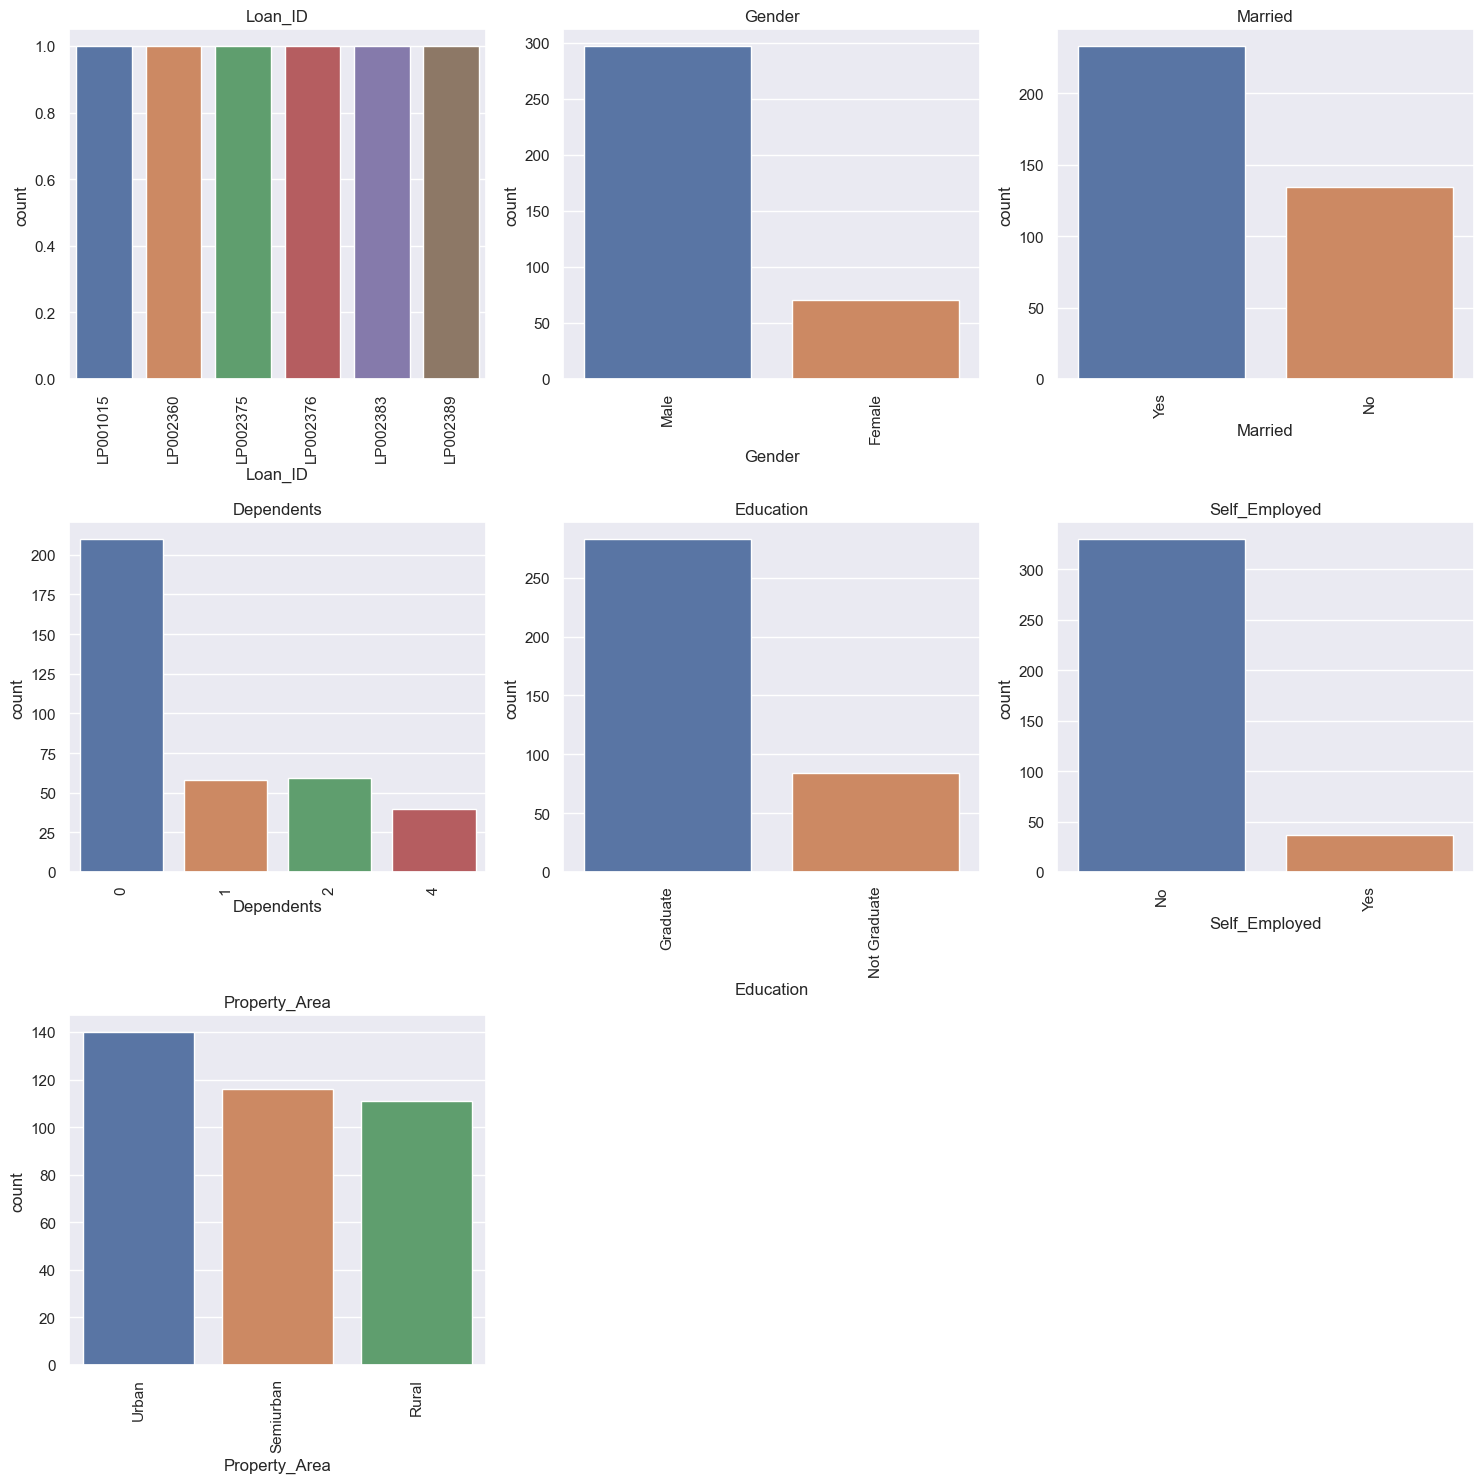

In [12]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df1.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df1[var].value_counts().nlargest(6).index
    filtered_df1 = df1[df1[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df1, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
fig.tight_layout()
plt.show()

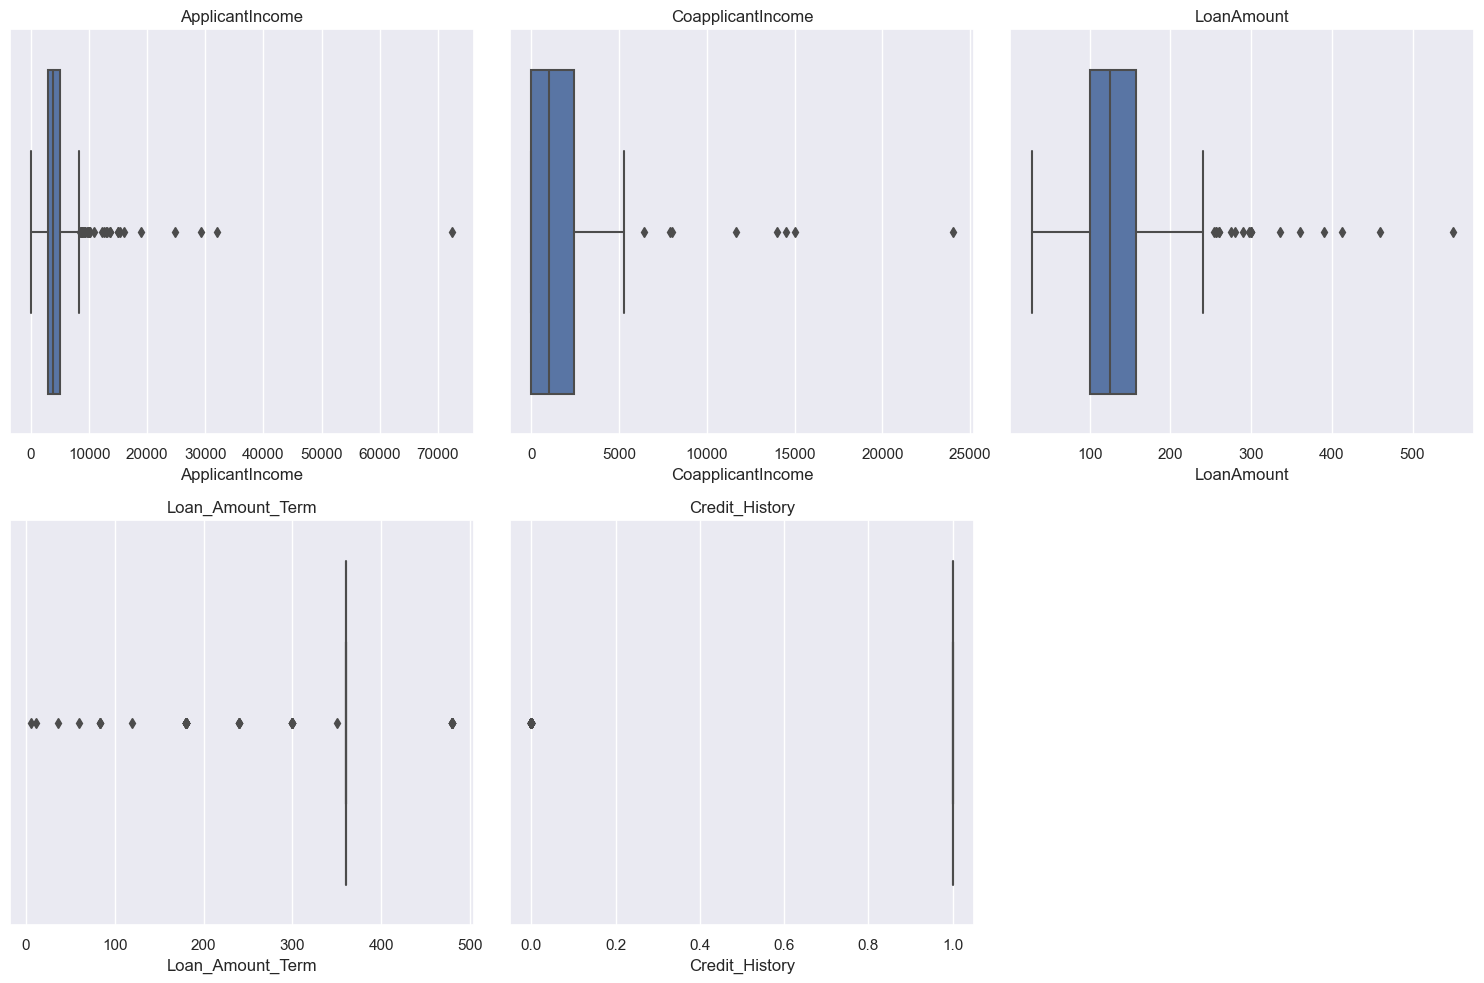

In [13]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = df1.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df1[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
fig.tight_layout()
plt.show()

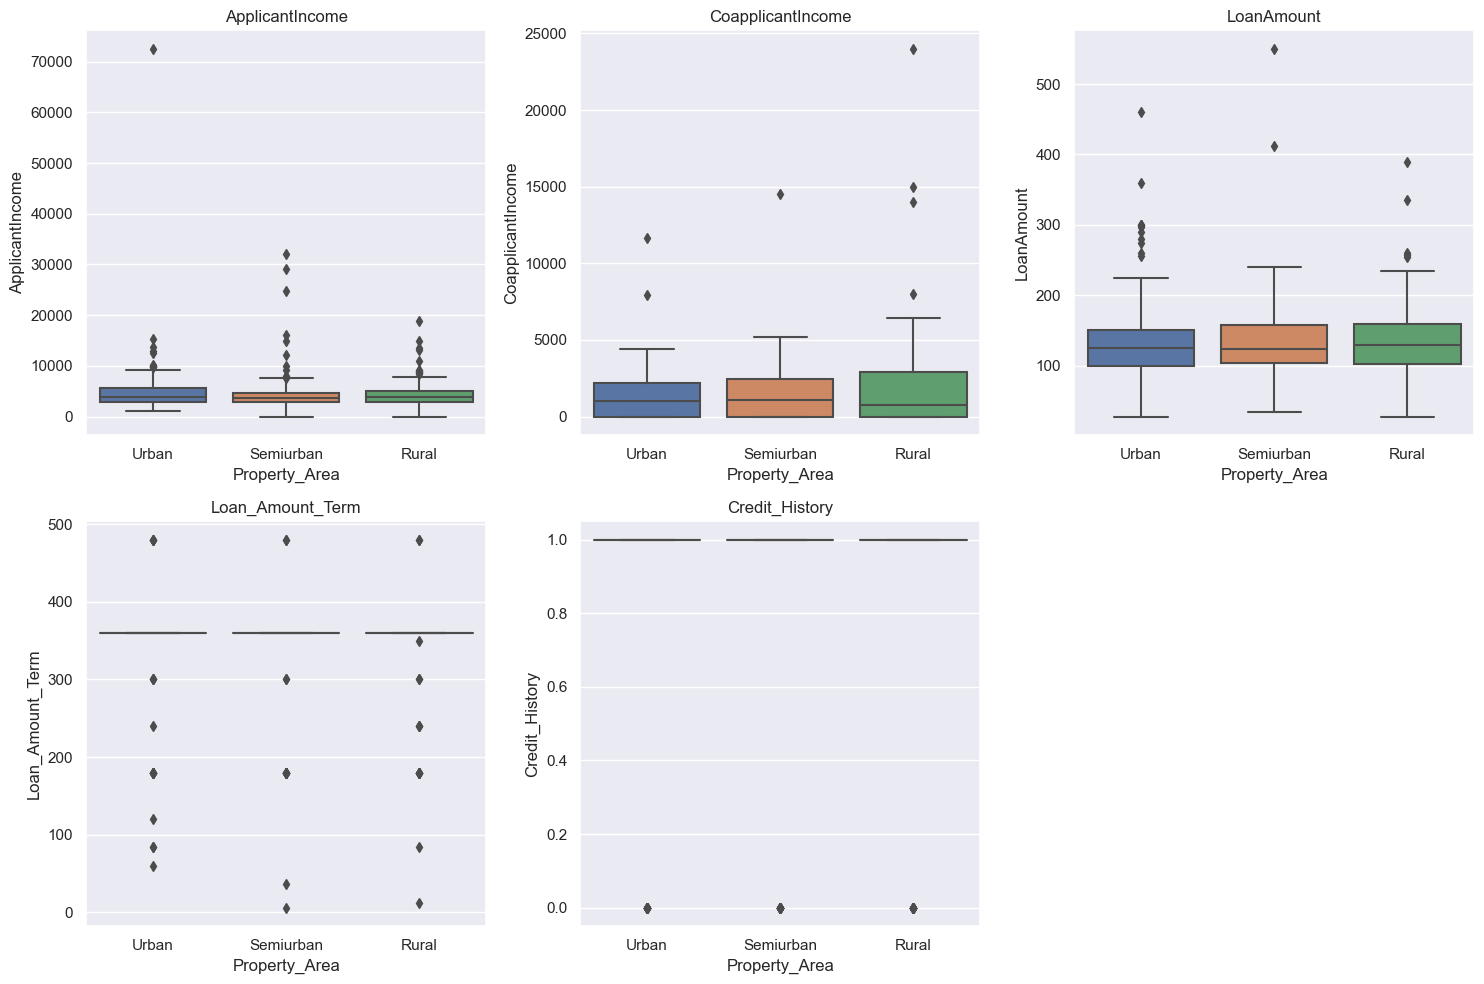

In [14]:
# Get the names of all columns with data type 'int'
int_vars = df1.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x=df1[column], data=df1, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

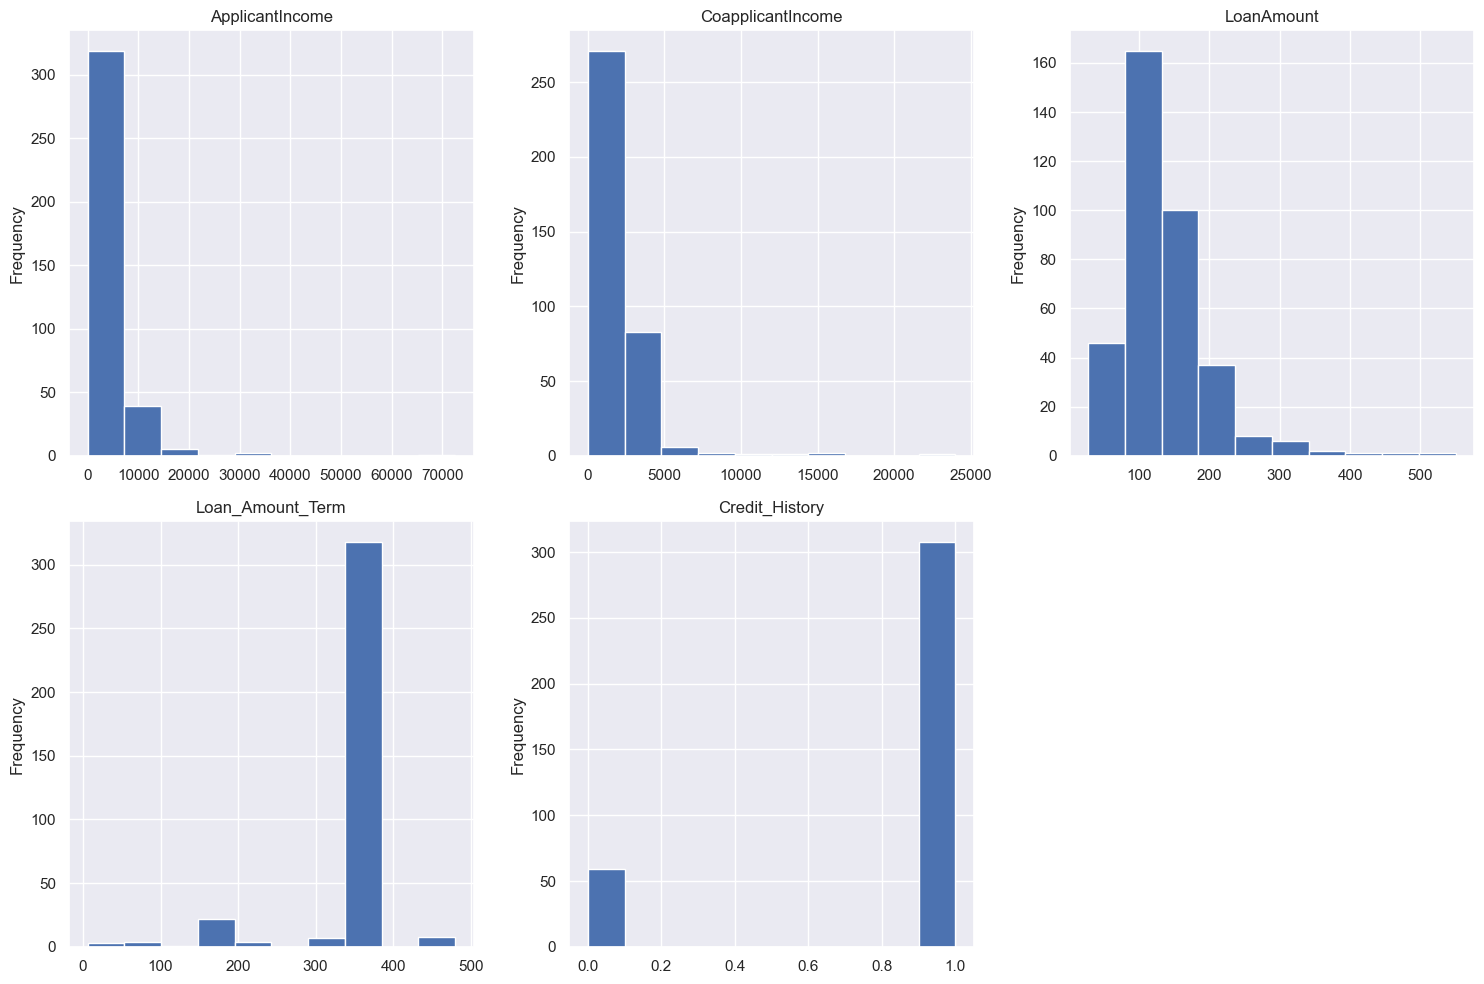

In [15]:
# Get the names of all columns with data type 'int'
int_vars = df1.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3           # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df1[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

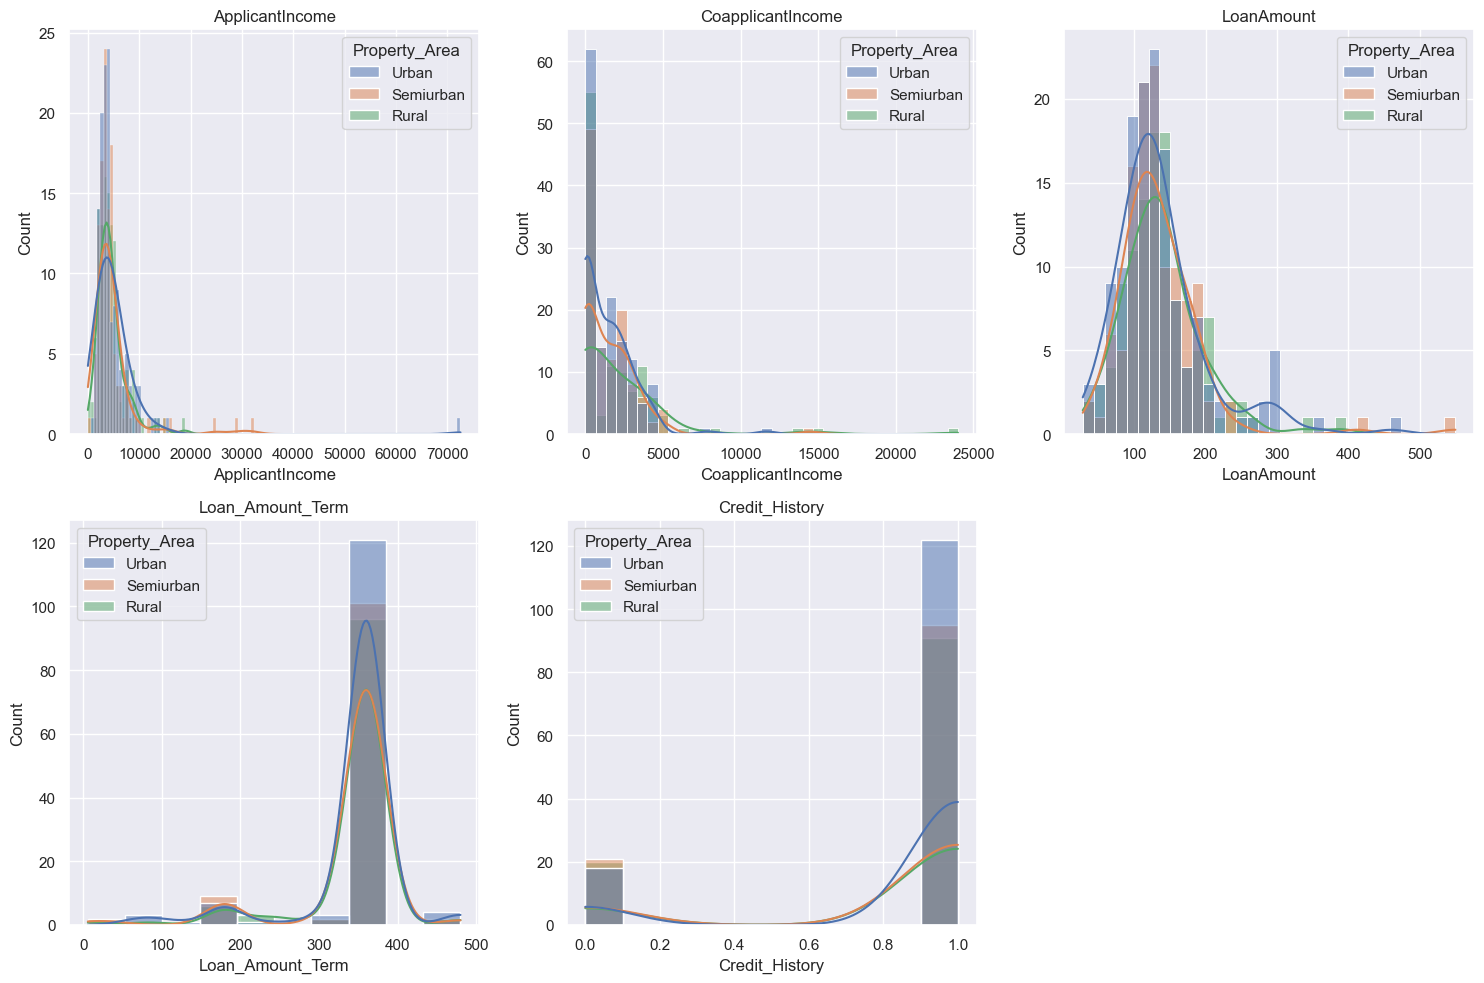

In [16]:
# Get the names of all columns with data type 'int'
int_vars = df1.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df1, x=var, 
                 hue=df1[column], kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

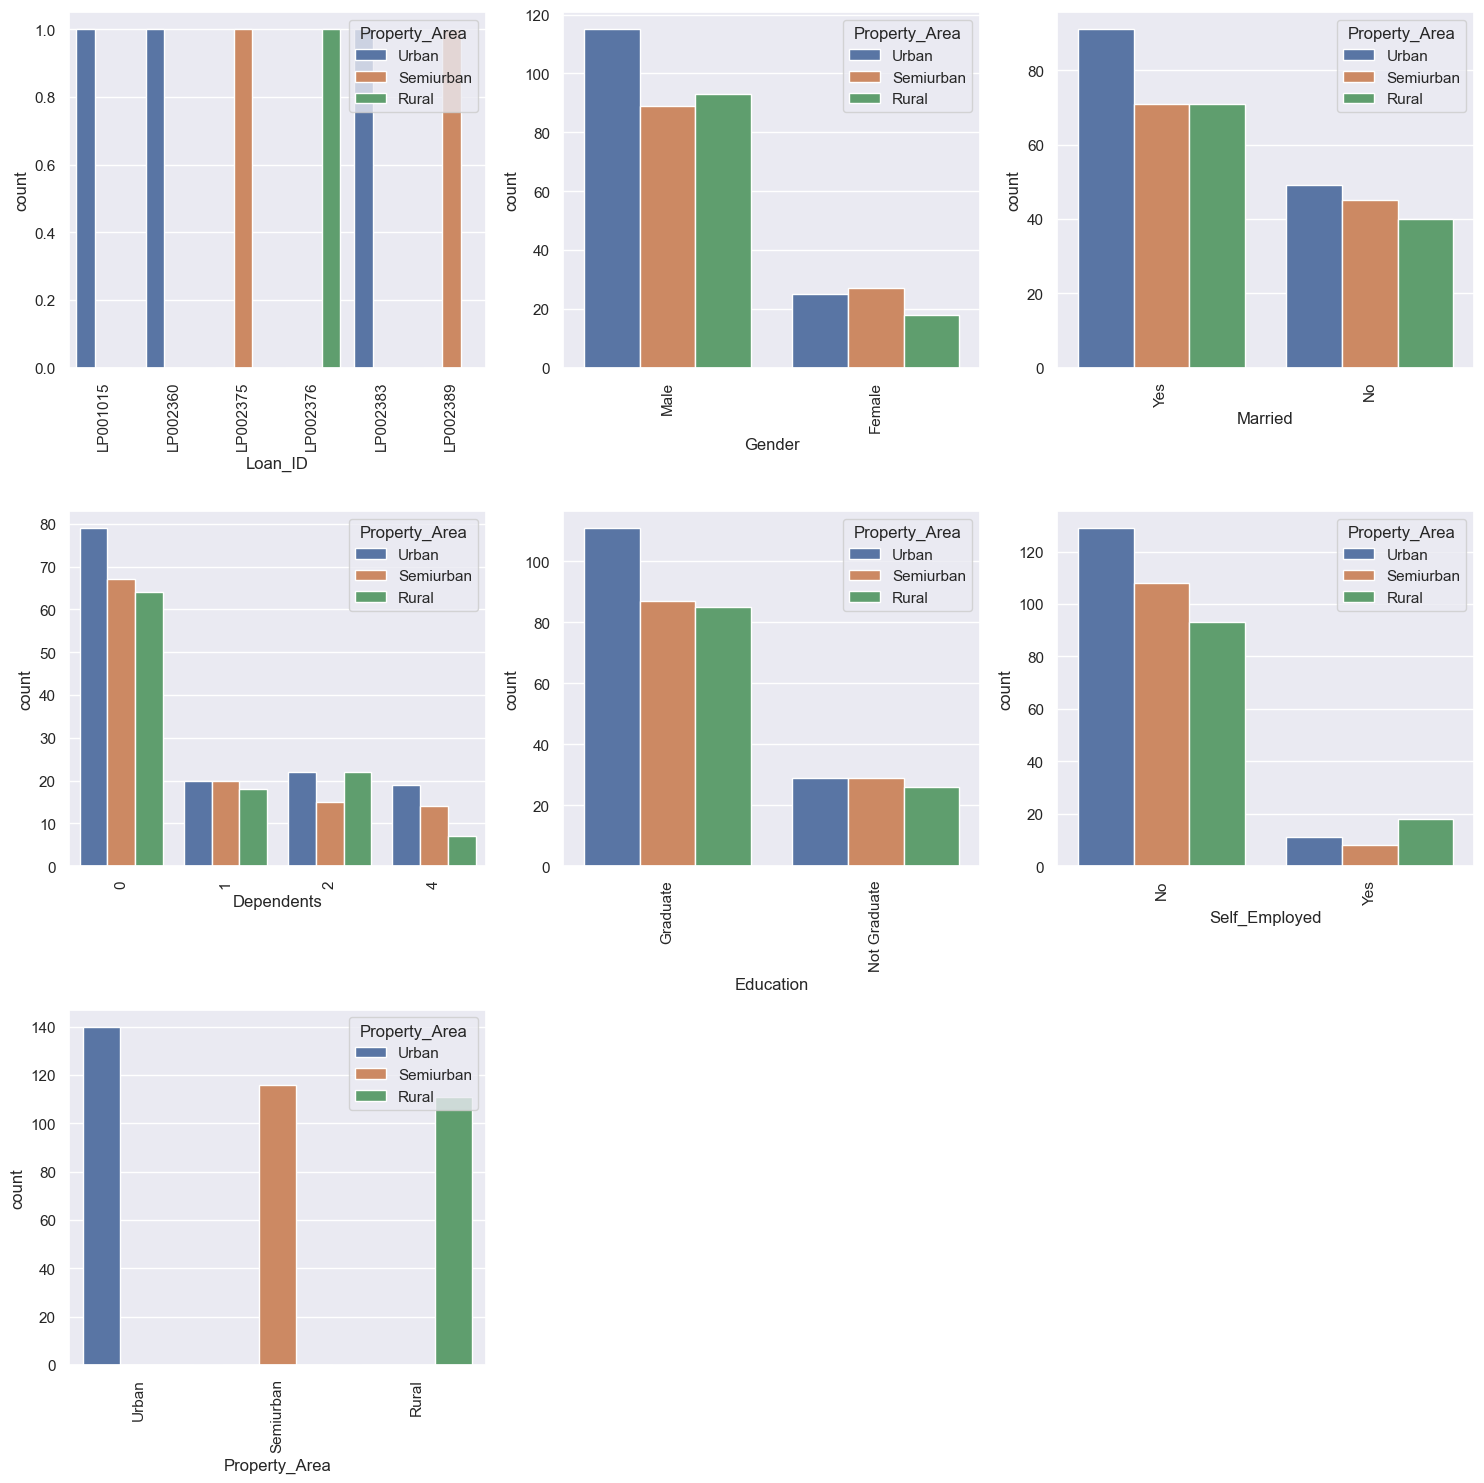

In [17]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df1.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
# if 'Loan_Status' in cat_vars:
#    cat_vars.remove('Loan_Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat_vars):
    top_values = df1[var].value_counts().nlargest(6).index
    filtered_df1 = df1[df1[var].isin(top_values)]
    sns.countplot(x=var, hue=df1[column], data=filtered_df1, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])
    
fig.tight_layout()
plt.show()

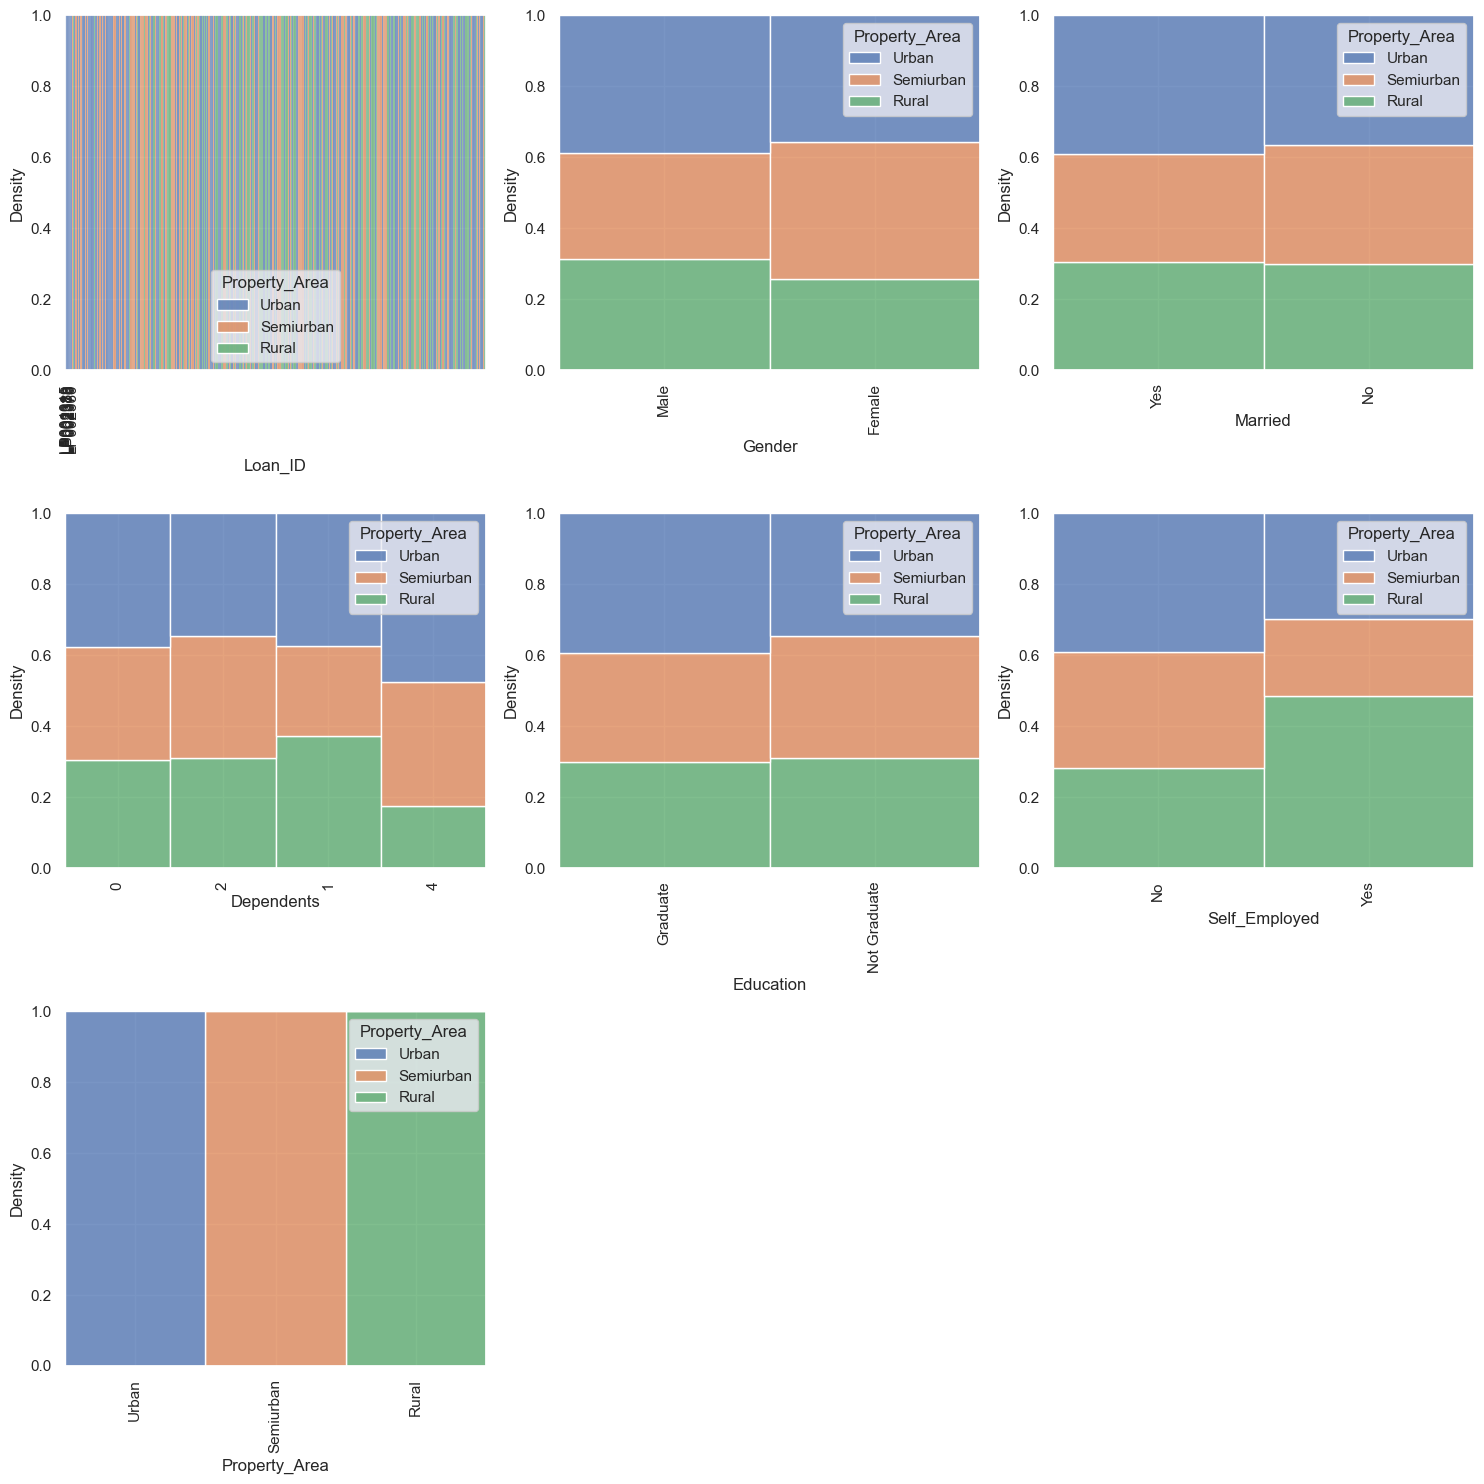

In [18]:
import warnings

# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df1.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
# if 'Loan_Status' in cat_vars:
#    cat_vars.remove('Loan_Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable as a density plot
for i, var in enumerate(cat_vars):
    top_values = df1[var].value_counts().nlargest(6).index
    filtered_df = df1[df1[var].isin(top_values)]

    # Set x-tick positions explicitly
    tick_positions = range(len(top_values))
    axs[i].set_xticks(tick_positions)
    axs[i].set_xticklabels(top_values, rotation=90)  # Set x-tick labels

    sns.histplot(x=var, hue=df1[column], data=filtered_df1, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xlabel(var)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])
    
fig.tight_layout()
plt.show()

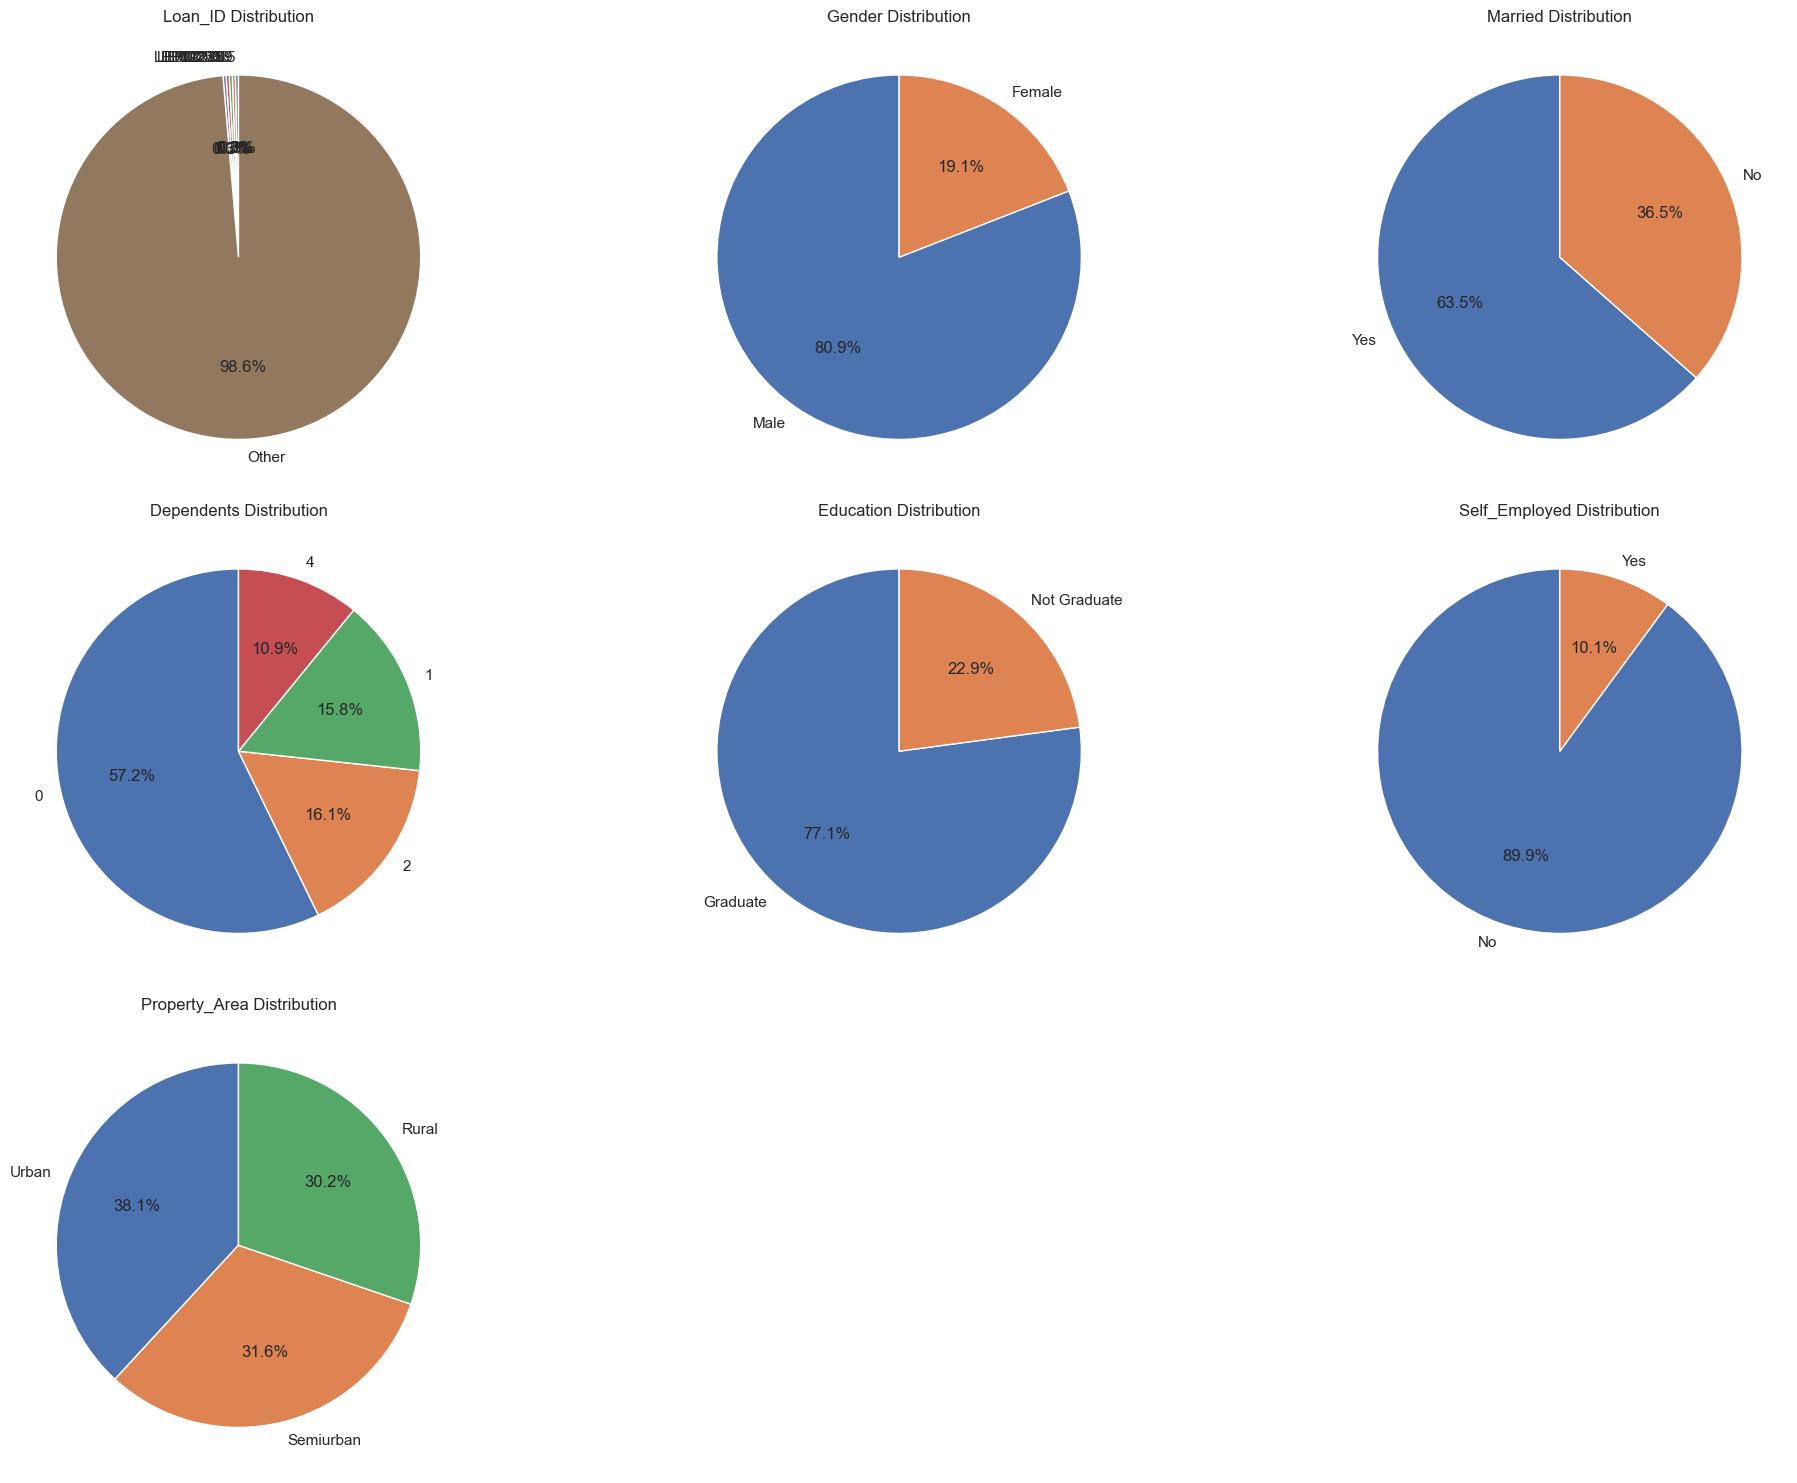

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df1.columns if col != 'y' and df1[col].dtype == 'object']

# Calculate the number of rows and columns dynamically
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3            # Adjust the divisor for the desired number of columns per row

# Create a figure with subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=min(3, num_cols), figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df1[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = pd.concat([cat_counts_top, cat_counts_other])

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

In [20]:
# Multi classification or Bi classifiacion

df1[column].value_counts()

Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64

In [21]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df1.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df1[col].unique()}")

Loan_ID: ['LP001015' 'LP001022' 'LP001031' 'LP001035' 'LP001051' 'LP001054'
 'LP001055' 'LP001056' 'LP001059' 'LP001067' 'LP001078' 'LP001082'
 'LP001083' 'LP001094' 'LP001096' 'LP001099' 'LP001105' 'LP001107'
 'LP001108' 'LP001115' 'LP001121' 'LP001124' 'LP001128' 'LP001135'
 'LP001149' 'LP001153' 'LP001163' 'LP001169' 'LP001174' 'LP001176'
 'LP001177' 'LP001183' 'LP001185' 'LP001187' 'LP001190' 'LP001203'
 'LP001208' 'LP001210' 'LP001211' 'LP001219' 'LP001220' 'LP001221'
 'LP001226' 'LP001230' 'LP001231' 'LP001232' 'LP001237' 'LP001242'
 'LP001268' 'LP001270' 'LP001284' 'LP001287' 'LP001291' 'LP001298'
 'LP001312' 'LP001313' 'LP001317' 'LP001321' 'LP001323' 'LP001324'
 'LP001332' 'LP001335' 'LP001338' 'LP001347' 'LP001348' 'LP001351'
 'LP001352' 'LP001358' 'LP001359' 'LP001361' 'LP001366' 'LP001368'
 'LP001375' 'LP001380' 'LP001386' 'LP001400' 'LP001407' 'LP001413'
 'LP001415' 'LP001419' 'LP001420' 'LP001428' 'LP001445' 'LP001446'
 'LP001450' 'LP001452' 'LP001455' 'LP001466' 'LP00147

In [22]:
cat_df1 = df1['Loan_ID']
cat_df1

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [23]:
df1.drop('Loan_ID',axis=1,inplace=True)

In [24]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df1.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df1[col].unique())

    # Transform the column using the encoder
    df1[col] = label_encoder.transform(df1[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df1[col].unique()}")

Gender: [1 0]
Married: [1 0]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Property_Area: [2 1 0]


In [25]:
corr=df1.corr(numeric_only=True)
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.265646,0.087744,0.033377,0.070422,0.063556,0.082811,0.073444,-0.060836,0.032978,-0.012373
Married,0.265646,1.000000,0.362190,0.049443,0.028374,0.051265,0.032548,0.179185,0.040692,0.037868,0.010921
Dependents,0.087744,0.362190,1.000000,0.129572,-0.024179,0.138004,-0.050024,0.134761,-0.053460,-0.051705,0.045462
Education,0.033377,0.049443,0.129572,1.000000,-0.010096,-0.136369,-0.057318,-0.155166,0.064173,-0.044072,-0.028660
Self_Employed,0.070422,0.028374,-0.024179,-0.010096,1.000000,0.073010,-0.027065,0.078151,-0.026972,0.097277,-0.109095
ApplicantIncome,0.063556,0.051265,0.138004,-0.136369,0.073010,1.000000,-0.110335,0.488737,0.023319,0.094944,0.039403
CoapplicantIncome,0.082811,0.032548,-0.050024,-0.057318,-0.027065,-0.110335,1.000000,0.150034,-0.008633,-0.058004,-0.095955
LoanAmount,0.073444,0.179185,0.134761,-0.155166,0.078151,0.488737,0.150034,1.000000,0.091867,-0.012932,-0.011932
Loan_Amount_Term,-0.060836,0.040692,-0.053460,0.064173,-0.026972,0.023319,-0.008633,0.091867,1.000000,-0.048189,0.014360
Credit_History,0.032978,0.037868,-0.051705,-0.044072,0.097277,0.094944,-0.058004,-0.012932,-0.048189,1.000000,0.060034


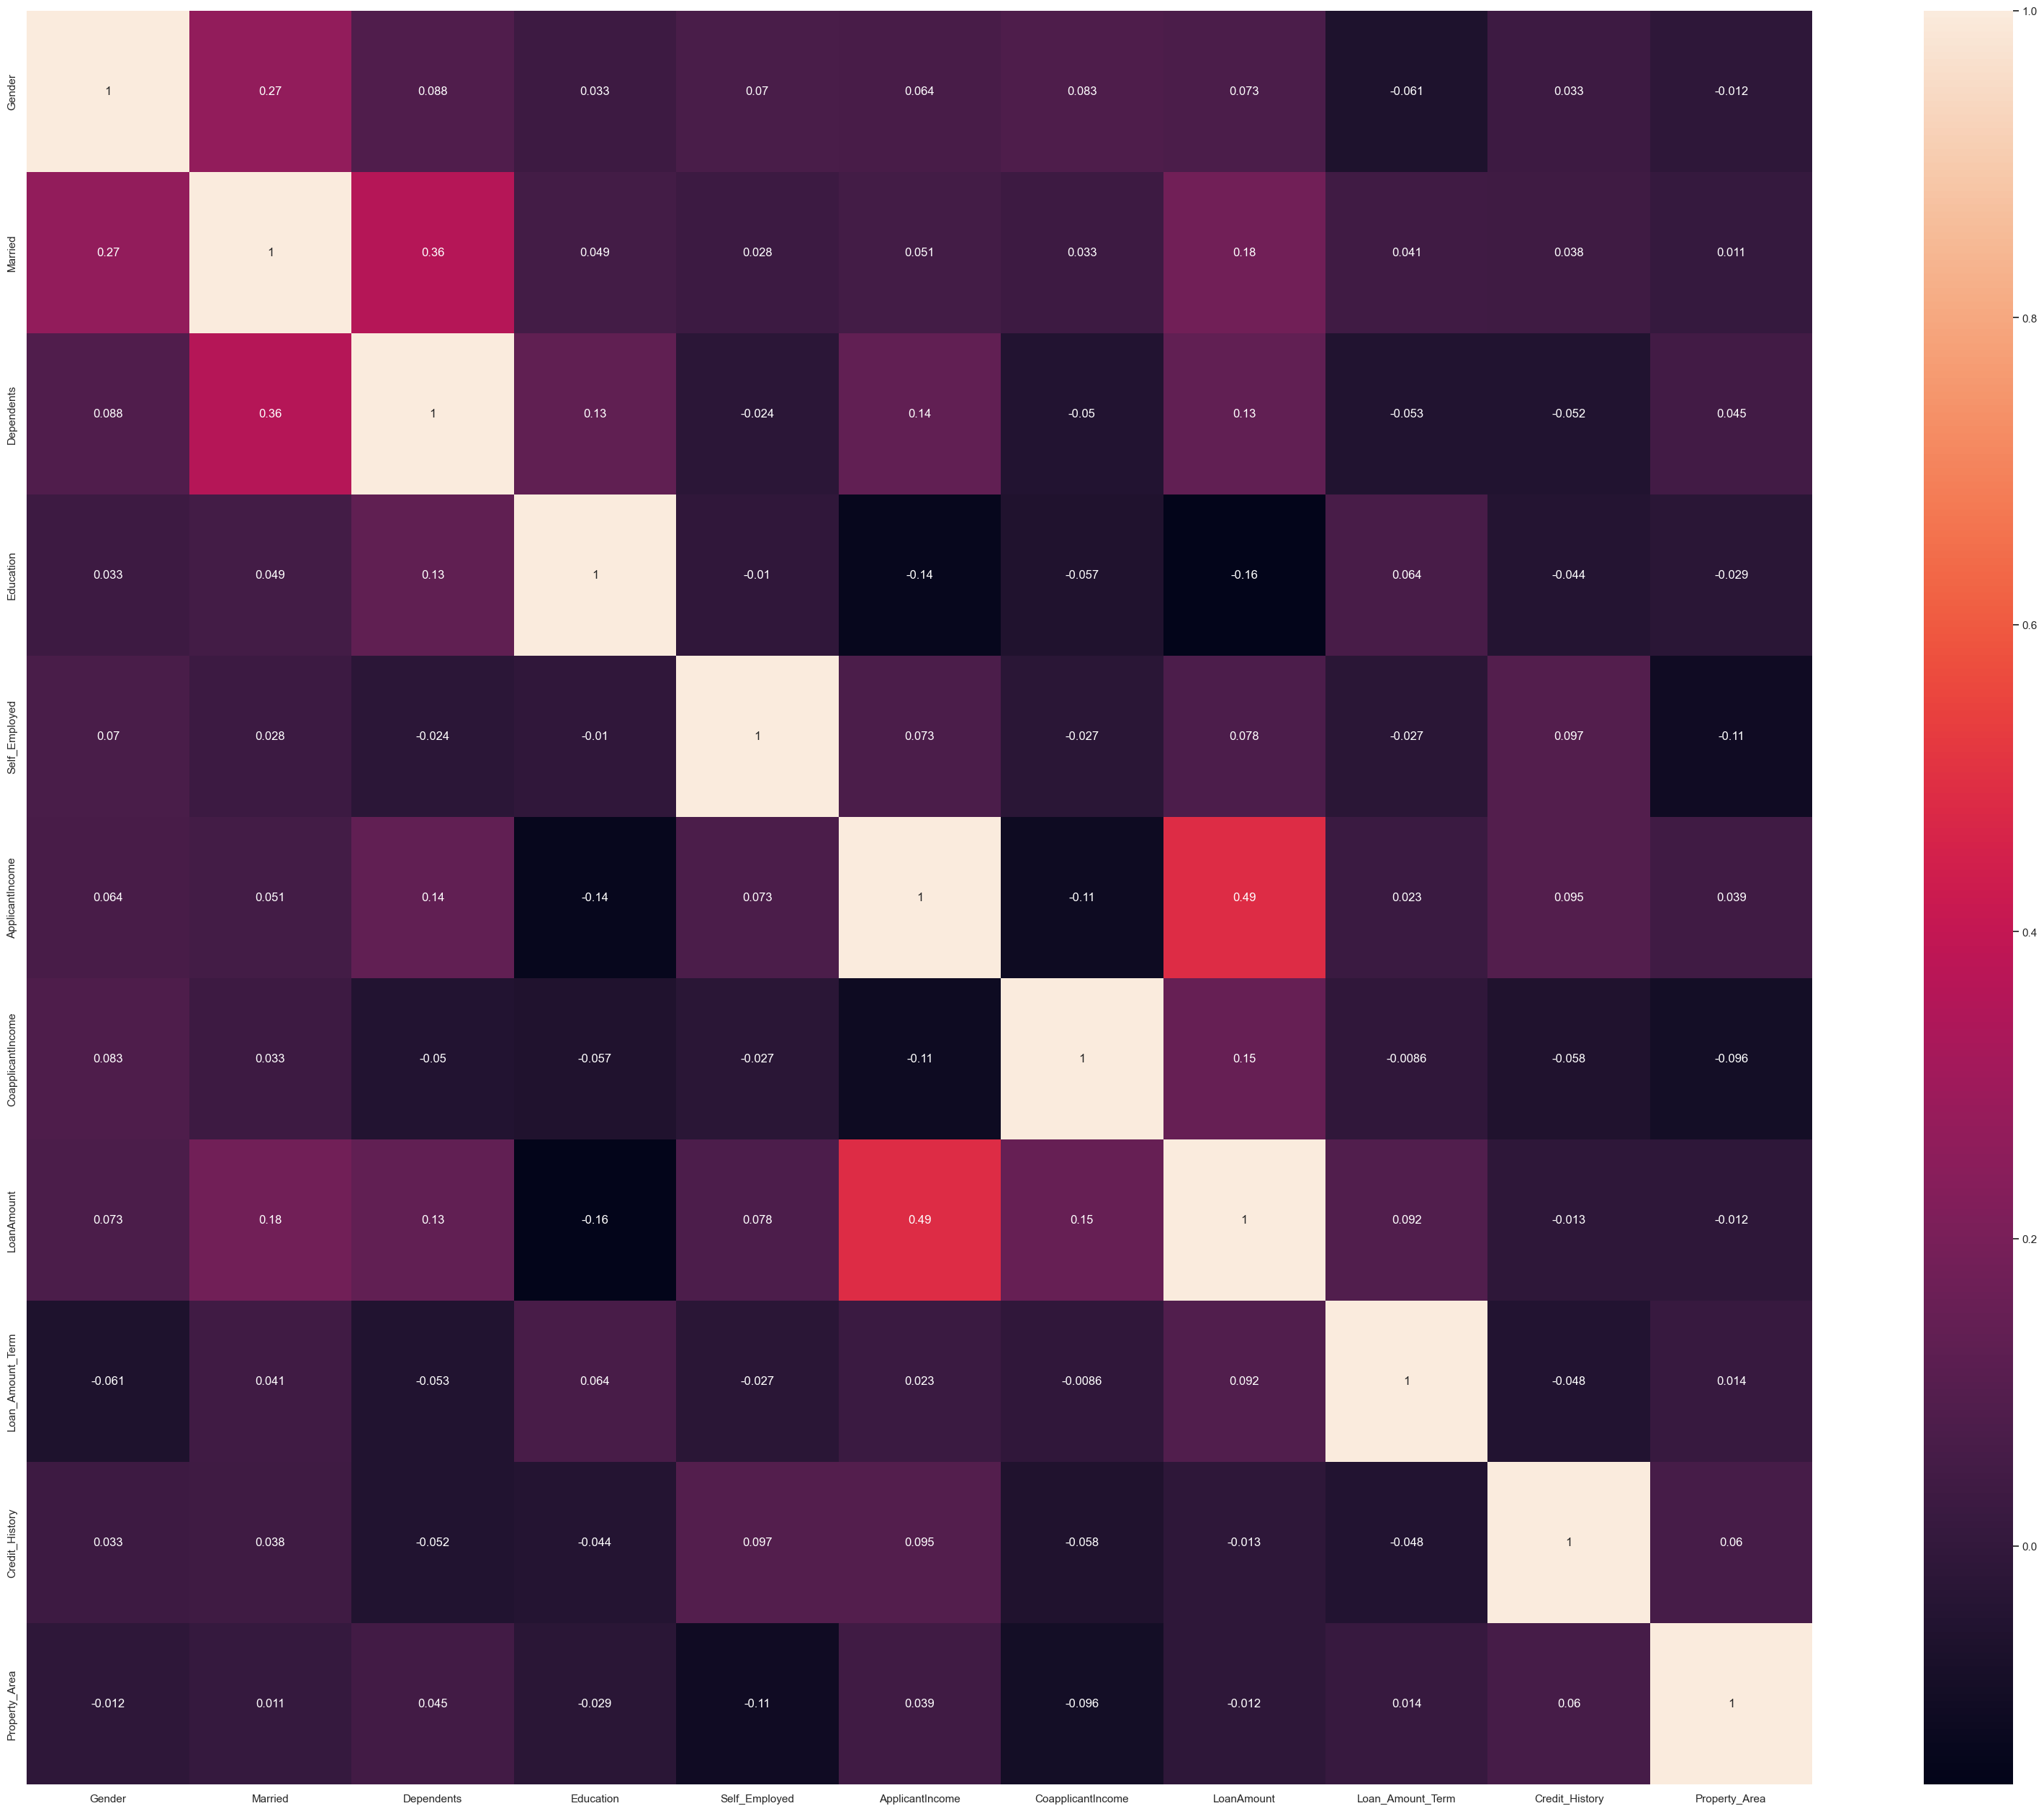

In [26]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df1.corr(), fmt='.2g', annot=True)
plt.show()

In [27]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [28]:
import pickle
log = pickle.load(open("loan_best_model",'rb'))

In [29]:
y_pred = log.predict(df1)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
pred_df1 = pd.DataFrame(y_pred,columns=['Loan_Status'])
pred_df1

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [31]:
a = pd.concat([cat_df1,pred_df1],axis = 1)
a

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [32]:
def gaddi(i):
    return 'Y' if i == 1 else 'N'

In [33]:
a['Loan_Status'] = a['Loan_Status'].apply(gaddi)
a

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [34]:
status_counts = a['Loan_Status'].value_counts()

print(status_counts)

Loan_Status
Y    367
Name: count, dtype: int64


In [35]:

import pandas as pd


# Reset the index and drop the original index column
#a = a.reset_index(drop=True)
a = a.set_index('Loan_ID')
a

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
...,...
LP002971,Y
LP002975,Y
LP002980,Y


In [36]:
a.to_csv("loan_best_prediction1.csv")